#### EXPLORATORY DATA ANALYSIS

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data/healthcare-dataset-stroke-data.csv')

In [5]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [6]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [7]:
print(f'Number of null values in the dataset: {df.isnull().values.any().sum()}')
print(f'Number of duplicated rows: {df.duplicated().sum()}')

Number of null values in the dataset: 1
Number of duplicated rows: 0


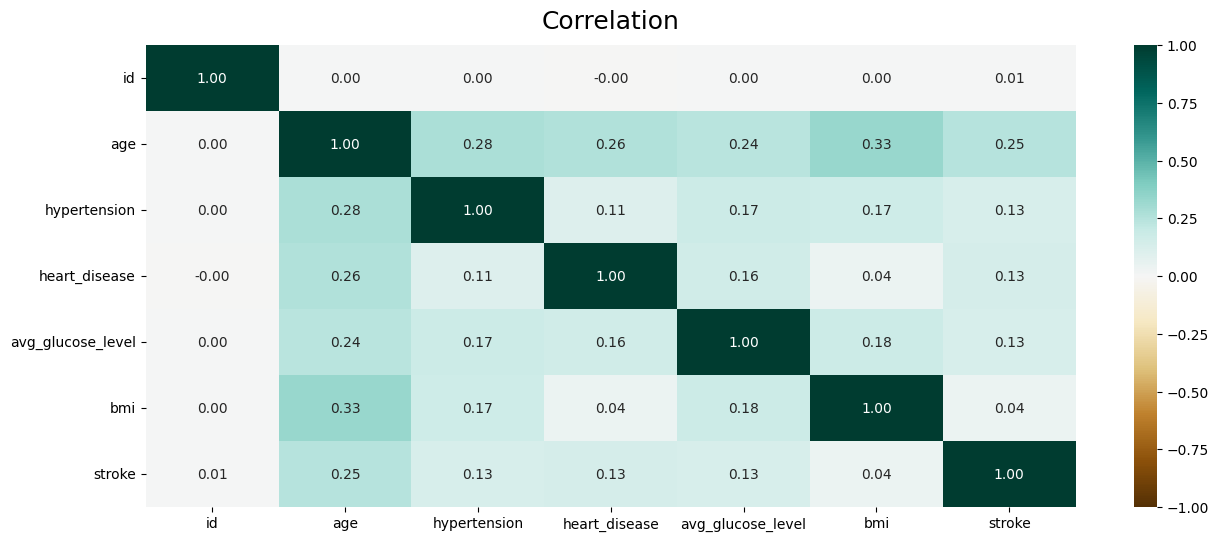

In [8]:
corr_df = df.corr(numeric_only=True)

plt.figure(figsize=(15, 6))
heatmap = sns.heatmap(corr_df, annot=True, fmt=".2f", cmap='BrBG', vmin=-1, vmax=1)
heatmap.set_title('Correlation', fontdict={'fontsize':18}, pad=12);

plt.show()

/home/belenareal/python_projects/env/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


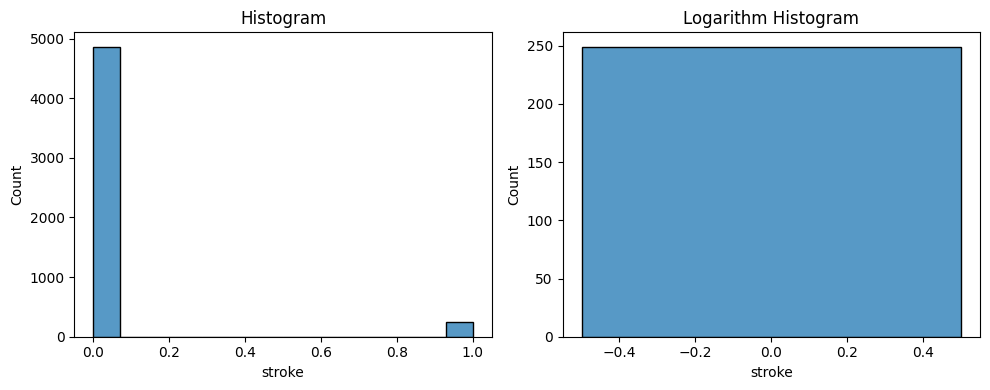

In [9]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(df['stroke'], ax=axs[0])
axs[0].set_title('Histogram')

sns.histplot(np.log(df['stroke']), ax=axs[1])
axs[1].set_title('Logarithm Histogram')

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

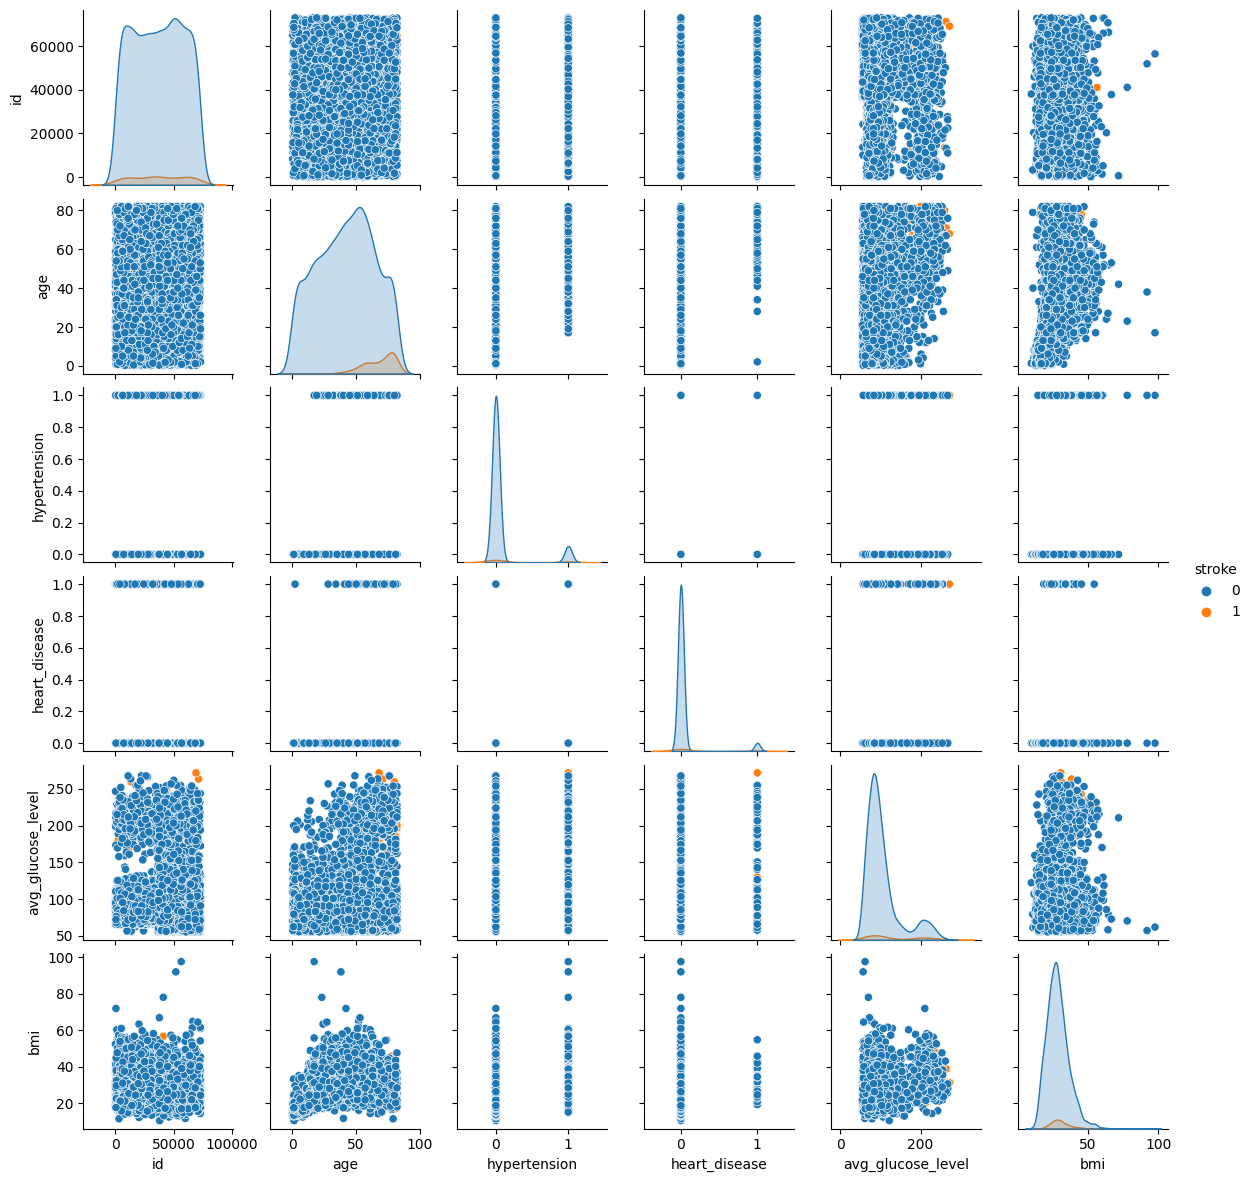

In [10]:
plt.figure()

sns.pairplot(df,hue='stroke',height=2)

plt.show()

In [11]:
df['stroke'].value_counts(normalize=True) * 100

0    95.127202
1     4.872798
Name: stroke, dtype: float64

In [12]:
### metrica que no tenga en cuenta eso

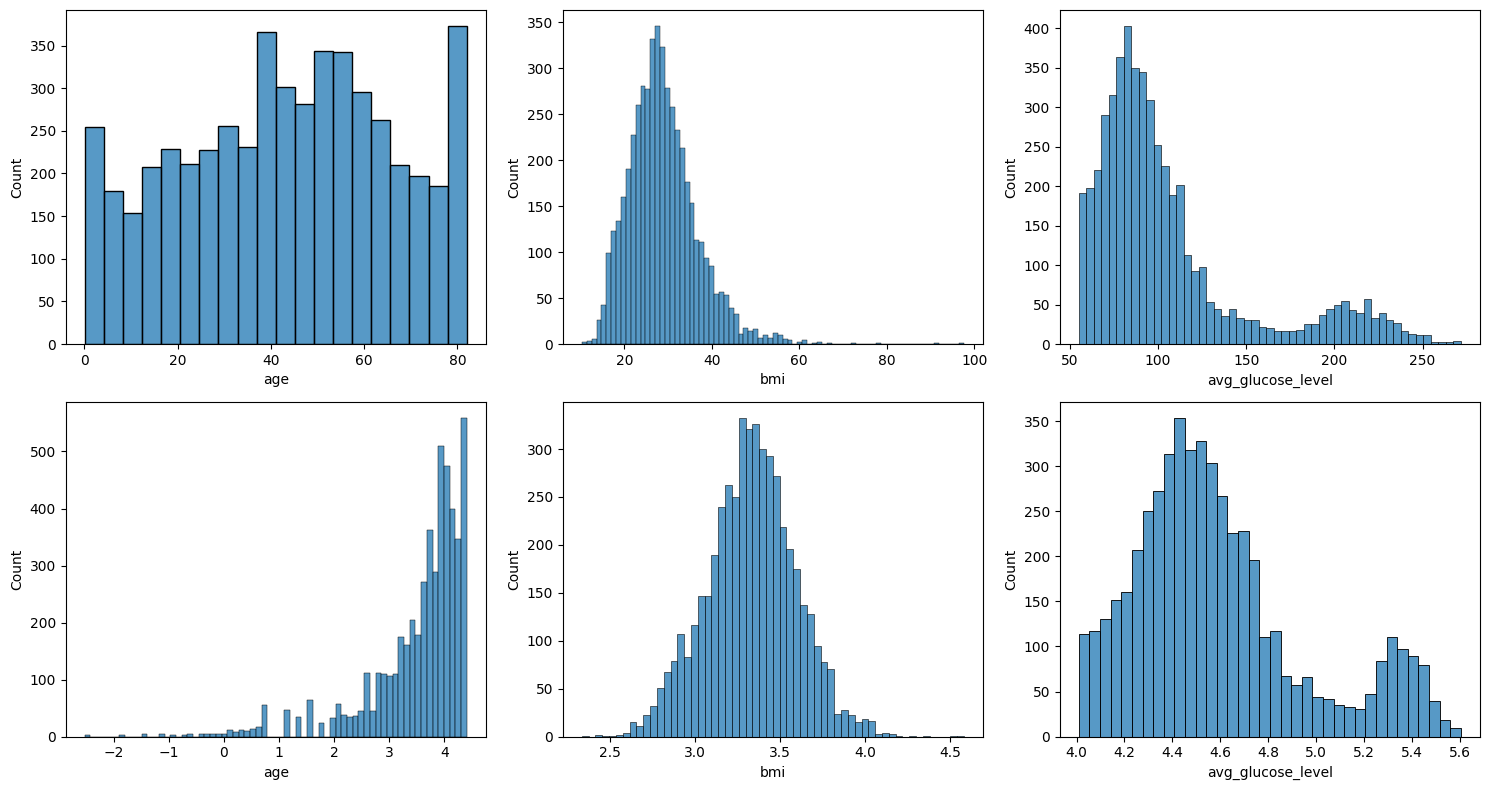

In [18]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))

sns.histplot(df['age'], ax=axs[0,0])
sns.histplot(df['bmi'], ax=axs[0,1])
sns.histplot(df['avg_glucose_level'], ax=axs[0,2])

sns.histplot(np.log(df['age']), ax=axs[1,0])
sns.histplot(np.log(df['bmi']), ax=axs[1,1])
sns.histplot(np.log(df['avg_glucose_level']), ax=axs[1,2])


plt.tight_layout()
plt.show()

In [ ]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


<AxesSubplot: >

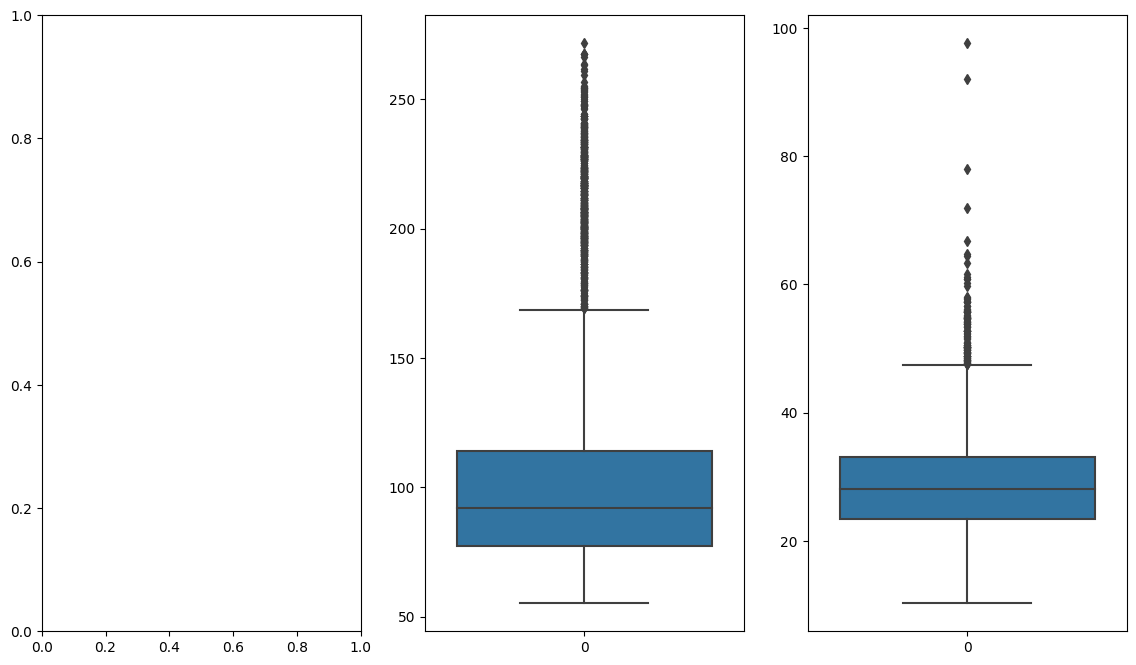

In [25]:
fig,axs=plt.subplots(nrows=1,ncols=3,figsize=(14,8))
# sns.boxplot(y=df['age'],ax=axs[0], hue=df['stroke'])
sns.boxplot(df['avg_glucose_level'],ax=axs[1])
sns.boxplot(df['bmi'],ax=axs[2])


In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df.nunique()

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

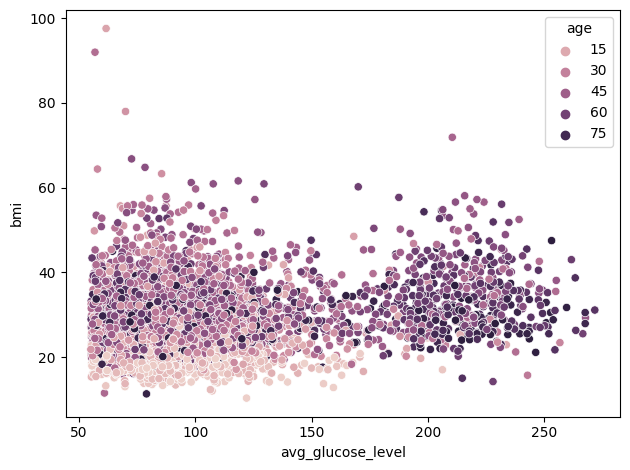

In [ ]:
sns.scatterplot(data=df, x='avg_glucose_level', y='bmi', hue='age')
plt.tight_layout()
plt.show()

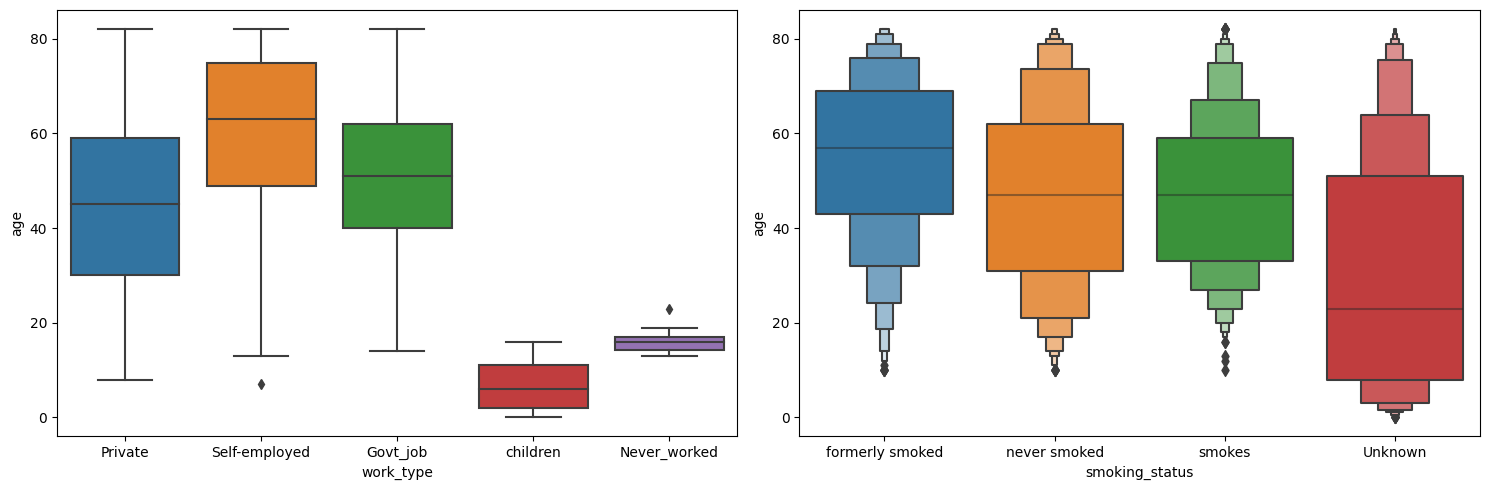

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
sns.boxplot(data=df, x='work_type', y='age', ax=axs[0])
sns.boxenplot(data=df, x='smoking_status', y='age', ax=axs[1])

plt.tight_layout()
plt.show()